## $$\text{Modelo lognormal (Movimiento Browniano Geométrico)}$$

### $$ dS_t = \mu S_t \, dt + \sigma S_t \, dW_t $$
donde
- $\mu$ rendimiento de los log returns
- $\sigma$ es la volatilidad 
- $S_t$ es el precio en el momento $t$
- $W_t$ es un proceso de Wiener estándar


#### Sea $Y_t = ln(S_t)$, haciendo uso del lemma de Itô, se tiene que
- $f(x, t) = ln(x)$
- $\frac{\partial f}{\partial t} = 0$
- $\frac{\partial f}{\partial x} = \frac{1}{x}$
- $\frac{\partial^2 f}{\partial x^2} = -\frac{1}{x^2}$
- $\mu' = \mu S_t$
- $\sigma' = \sigma S_t$

Ahora, 
$$d(Y_t) = d(ln(S_t) = \left(\frac{\partial f(S_t, t)}{\partial t} + \mu' \cdot \frac{\partial f(S_t, t)}{\partial x} + \frac{{\sigma'}^2}{2} \cdot \frac{\partial^2 f(S_t, t)}{\partial x^2} \right)dt + \left(\sigma' \cdot \frac{\partial f(S_t, t)}{\partial x}\right) dW_t$$

$$= \left(0 + (\mu) S_t \cdot \frac{1}{S_t} + \frac{\sigma^2}{2}  S_t^2 \cdot \frac{-1}{S_t^2}\right) dt + \left(\sigma S_t \cdot \frac{1}{S_t}\right) dW_t$$

$$= \left(\mu  - \frac{\sigma^2}{2}  \right) dt + \sigma dW_t$$

Integrando ambos lados de la ecuación se obtiene:

$$\int_{0}^{t} d(ln(S_t) =  \int_{0}^{t} \left(\mu  - \frac{\sigma^2}{2}  \right) dt + \int_{0}^{t} \sigma dW_t$$

donde:
- $\int_{0}^{t} d(ln(S_t) = ln(S_t)\Big|_0^t = ln(S_t) - ln(S_0)$
- $\int_{0}^{t} \left(\mu  - \frac{\sigma^2}{2}  \right) dt = \left(\mu - \frac{\sigma^2}{2}  \right) t \Big|_0^t =  \left(\mu - \frac{\sigma^2}{2}  \right) t$
- $\int_{0}^{t} \sigma dW_t = \sigma (W_t - W_0) = \sigma W_t$

por lo que 
$$ ln(S_t) = ln(S_0) + \left(\mu - \frac{\sigma^2}{2}  \right) t + \sigma W_t$$

$$\implies S_t = S_0 \cdot e^{ \left(\mu - \frac{\sigma^2}{2}\right)t + \sigma W_t}$$

### $\text{Media}$

$$
\mathbb{E}(S_t) = \mathbb{E}\left[ S_0 \cdot e^{\left(\mu - \frac{\sigma^2}{2}\right)t + \sigma W_t} \right]
$$

$$
\mathbb{E}(S_t) = S_0 \cdot e^{\left(\mu - \frac{\sigma^2}{2}\right)t} \mathbb{E}[e^{(\sigma W_t)}]
$$

$$
\mathbb{E}(S_t) = S_0 \cdot e^{\left(\mu - \frac{\sigma^2}{2}\right)t + \frac{\sigma^2 \cdot t}{2}}
$$

$$
\mathbb{E}(S_t) = S_0 \cdot e^{\mu t}
$$

### $\text{Varianza}$

$$
\text{Var}(S_t) = \text{Var}\left( S_0 \cdot e^{\left(\mu - \frac{\sigma^2}{2}\right)t + \sigma W_t} \right)
$$

$$
\text{Var}(S_t) = \mathbb{E}\left( S_0^2 \cdot e^{2\left(\mu - \frac{\sigma^2}{2}\right)t + 2\sigma W_t} \right) 
- \mathbb{E}\left(S_0 \cdot e^{ \left(\mu - \frac{\sigma^2}{2}\right)t + \sigma W_t} \right)^2
$$

$$
\text{Var}(S_t) = \mathbb{E}\left( S_0^2 \cdot e^{2\left(\mu - \frac{\sigma^2}{2}\right)t + 2\sigma W_t} \right) 
- (S_0 \cdot e^{\mu \cdot t})^2
$$


$$
\text{Var}(S_t) = S_0^2 \cdot e^{2\mu\cdot t - \frac{2\sigma^2}{2}t} \cdot \mathbb{E} \left( e^{2\sigma W_t}\right) - S_0^2 \cdot e^{2\mu t}
$$

$$
\text{Var}(S_t) = S_0^2 \cdot e^{2\mu \cdot t - \frac{2\sigma^2}{2}t} \cdot  \left( e^{\frac{4\sigma t^2}{2}}\right) - S_0^2 \cdot e^{2\mu t}
$$

$$
\text{Var}(S_t) = S_0^2 \cdot e^{2\mu \cdot t - \sigma^2 t + 2\sigma^2 t}
- S_0^2 \cdot e^{2\mu t}
$$

$$
\text{Var}(S_t) = S_0^2 \cdot e^{2\mu \cdot t + \sigma^2 t}
- S_0^2 \cdot e^{2\mu t}
$$

$$
\text{Var}(S_t) = S_0^2 \cdot e^{2\mu t} \cdot \left(e^{\sigma^2 t} - 1 \right)
$$

### $\text{Estimación de los parámetros}$

Debido a que los log-rendimientos $\sim N(\mu, \sigma^2)$, podemos estimarlos mediante máxima verosimilitud o por el método de momentos.

Para el método de momentos y por máxima verosimilitud, se tiene que:
- $\hat{\mu} = \overline{x}$
- $\hat{\sigma} = \frac{n-1}{n} s^2 $



In [230]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import drange
import sympy as sp
import math
import pandas as pd
import random
import yfinance
import time
import datetime

In [2]:
class normal:
    def __init__(self, miu, sigma):
        self.a = miu
        self.b = sigma

    def random(self):
        u1 = random.random()
        u2 = random.random()
        v1 = 2 * u1 - 1
        v2 = 2 * u2 - 1
        B = v1**2 + v2**2
        while B > 1:
            u1 = random.random()
            u2 = random.random()
            v1 = 2 * u1 - 1
            v2 = 2 * u2 - 1
            B = v1**2 + v2**2
        z1 = math.sqrt(-2 * math.log(B) / B) * v1 * self.b + self.a
        z2 = math.sqrt(-2 * math.log(B) / B) * v2 * self.b + self.a
        return [z1, z2]

    def randoms(self, n):
        v = []
        k = n % 2
        if k == 1:
            for i in range(0, n // 2):
                v.extend(self.random())
            v.append(self.random()[0])
        else:
            for i in range(0, n // 2):
                v.extend(self.random())
        return v

In [432]:
class SDE:
#     params: parametros iniciales en un diccionario
#     s0: valor inicial del proceso
#     mu, sigma: deriva y difución en sympy

    def __init__(self, parametros, s0, mu, sigma):
        self.parametros = parametros
        self.s0 = s0
        self.mu = mu
        self.sigma = sigma
    
    def euler(self, T, n, n_simulaciones):
        plt.figure(figsize=(15, 5))
        dt = T / n
        for j in range(n_simulaciones):
            valores = normal(0, 1).randoms(n)
            proceso = [self.s0]
            valores_dt = [dt]
            s0_sim = self.s0
            delta_t = dt

            for i in range(1, len(valores)):
                si = s0_sim + mu.subs({**parametros, S:s0_sim, t:delta_t})*dt + sigma.subs({**parametros, S:s0_sim, t:delta_t})*valores[i]*np.sqrt(dt)
                proceso.append(si)
                s0_sim = si
                delta_t += dt
                valores_dt.append(dt*(i+1))
            x = np.arange(1, len(proceso)+1)
            
            plt.plot(valores_dt, proceso)
        plt.title('Euler simulation', fontsize=16)
        plt.xlabel('Tiempos', fontsize=12)
        plt.ylabel('Precio', fontsize=12)
        plt.grid()

        
    def milstein(self, T, n, n_simulaciones):
        plt.figure(figsize=(15, 5))
        dt = T / n
        for j in range(n_simulaciones):
            valores = normal(0, 1).randoms(n)
            proceso = [self.s0]
            valores_dt = [dt]
            s0_sim = self.s0
            delta_t = dt
            for i in range(1, len(valores)):
                si = s0_sim + mu.subs({**parametros, S:s0_sim,  t:delta_t})*dt + sigma.subs({**parametros, S:s0_sim,  t:delta_t})*valores[i]*np.sqrt(dt) + 1/2 * sp.diff(sigma, S).subs({**parametros, S:s0_sim, t:delta_t}) * sigma.subs({**parametros, S:s0_sim, t:delta_t}) * dt * (valores[i]**2 - 1)          
                proceso.append(si)
                s0_sim = si
                delta_t += dt
                valores_dt.append(dt*(i+1))
            x = np.arange(1, len(proceso)+1)
            plt.plot(valores_dt, proceso)
        plt.title('Milstein simulation', fontsize=16)
        plt.xlabel('Tiempos', fontsize=12)
        plt.ylabel('Precio', fontsize=12)
        plt.grid()

(0.0010841103728230197, 0.029456731244396694)

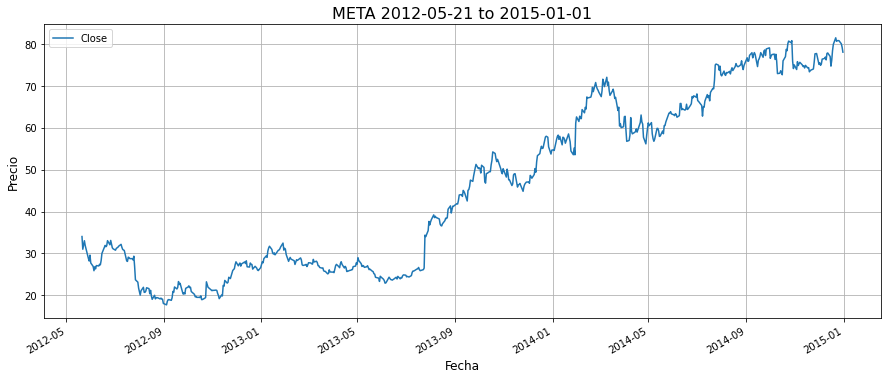

In [433]:
start = "2000-05-21"
end = "2015-01-01"
ticker = 'META'
company = yfinance.Ticker(ticker)
datos_company = company.history(start=start, end=end)
datos_company['log_returns'] = np.log(datos_company['Close'] / datos_company['Close'].shift(1))
datos_company = datos_company.drop(datos_company.index[0])
n_retornos = len(datos_company.index)
mu_est = np.mean(datos_company['log_returns'])
sigma_est = ((n_retornos - 1) * np.std(datos_company['log_returns'])) / n_retornos

datos = pd.DataFrame(datos_company['Close'], datos_company.index)
precios = datos_company['Close'].values
fechas = datos_company.index
dias = len(fechas)
s0 = precios[0]

ax1 = datos.plot(figsize=(15, 6))
ax1.set_title(ticker + ' ' + '2012-05-21' + ' to ' + end, fontsize=16)
ax1.set_xlabel('Fecha', fontsize=12)
ax1.set_ylabel('Precio', fontsize=12)
ax1.grid(True)
ax1.legend()
mu_est, sigma_est

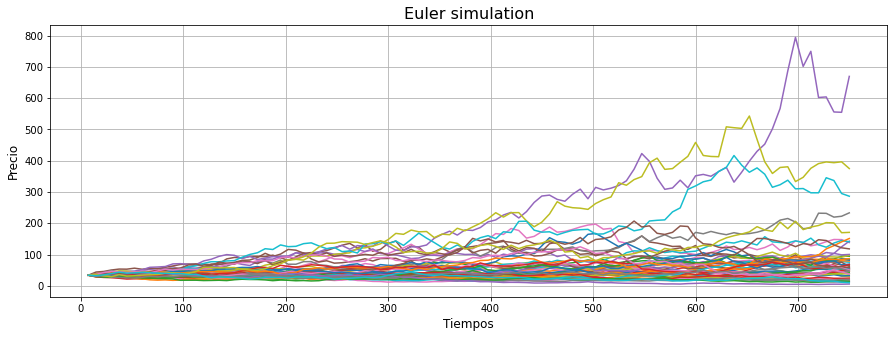

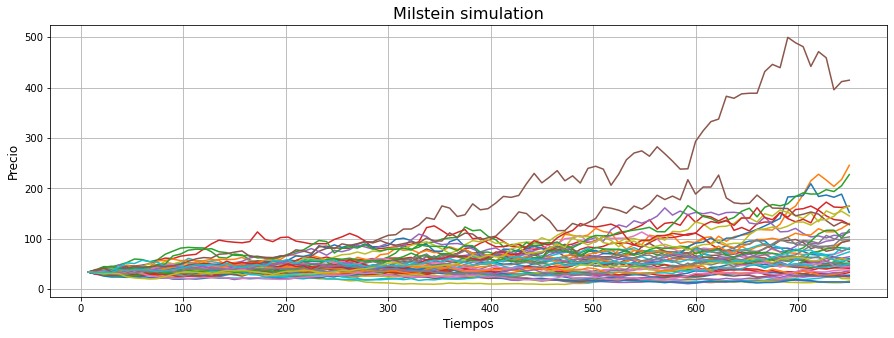

In [434]:
a, c , S, t = sp.symbols('a, c, S, t')
mu = a*S
sigma = c*S
parametros = {a: mu_est, c: sigma_est} 
modelo = SDE(parametros, s0, mu, sigma)
modelo.euler(750, 100, 50)
modelo.milstein(750, 100, 50)


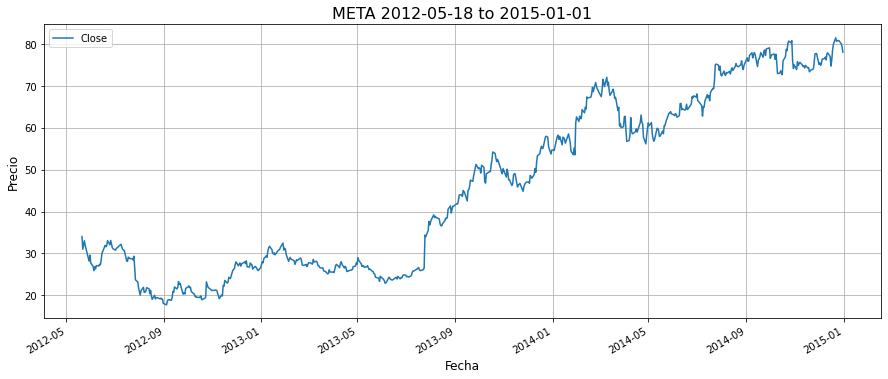

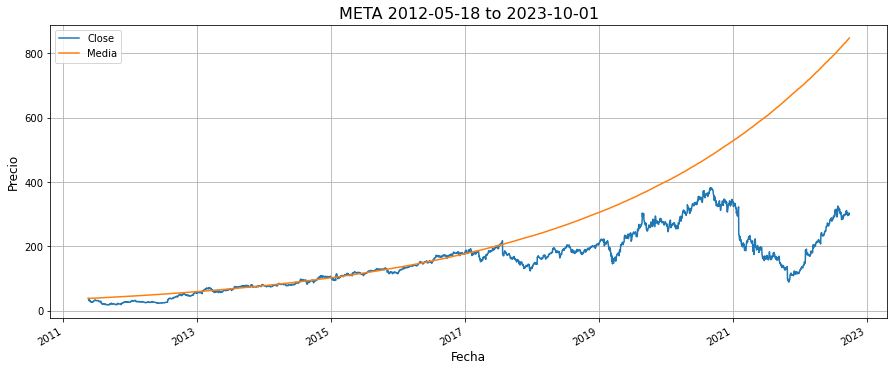

In [436]:
start = "2000-01-01"
end = "2015-01-01"
ticker = 'META'

company = yfinance.Ticker(ticker)
datos_company = company.history(start=start, end=end)
datos_company['log_returns'] = np.log(datos_company['Close'] / datos_company['Close'].shift(1))
inicio_ = datos_company.index[0].strftime('%Y-%m-%d')
datos_company = datos_company.drop(datos_company.index[0])
n_retornos = len(datos_company.index)
mu_est = np.mean(datos_company['log_returns'])
sigma_est = ((n_retornos - 1) * np.std(datos_company['log_returns'])) / n_retornos

datos = pd.DataFrame(datos_company['Close'], datos_company.index)
precios = datos_company['Close'].values
fechas = datos_company.index
dias = len(fechas)
s0 = precios[0]

ax1 = datos.plot(figsize=(15, 6))
ax1.set_title(ticker + ' ' + inicio_ + ' to ' + end, fontsize=16)
ax1.set_xlabel('Fecha', fontsize=12)
ax1.set_ylabel('Precio', fontsize=12)
ax1.grid(True)
ax1.legend()
mu_est, sigma_est

end = "2023-10-01"
company = yfinance.Ticker(ticker)
datos_company = company.history(start=start, end=end)

datos = pd.DataFrame(datos_company['Close'], datos_company.index)
precios = datos_company['Close'].values
fechas = datos_company.index
dias = len(fechas)
s0 = precios[0]

def media(s0, a, t):
    return s0*np.exp((a)*t)

ggg = media(s0, mu_est, range(dias))
dff = pd.DataFrame(index=fechas)
dff['Media'] = ggg

ax1 = datos.plot()
dff.plot(ax=ax1, figsize=(15, 6))
ax1.set_title(ticker + ' ' + inicio_ + ' to ' + end, fontsize=16)
ax1.set_xlabel('Fecha', fontsize=12)
ax1.set_ylabel('Precio', fontsize=12)
ax1.grid(True)
ax1.legend()

 $\text{Observamos que el precio sigue muy bien al modelo del 2015-2018}$

Sin embargo, el precio ya no siguió al modelo a la larga muy probablemente a factores externos que el modelo no considera. Como en 2020 el Covid o la situación que muchas empresas tecnológicas sufrieron en el cambio de su precio por finales de 2021, o por las tasas de interés.

Se muestra el gráfico del indice del sector de tecnología del Nasdaq

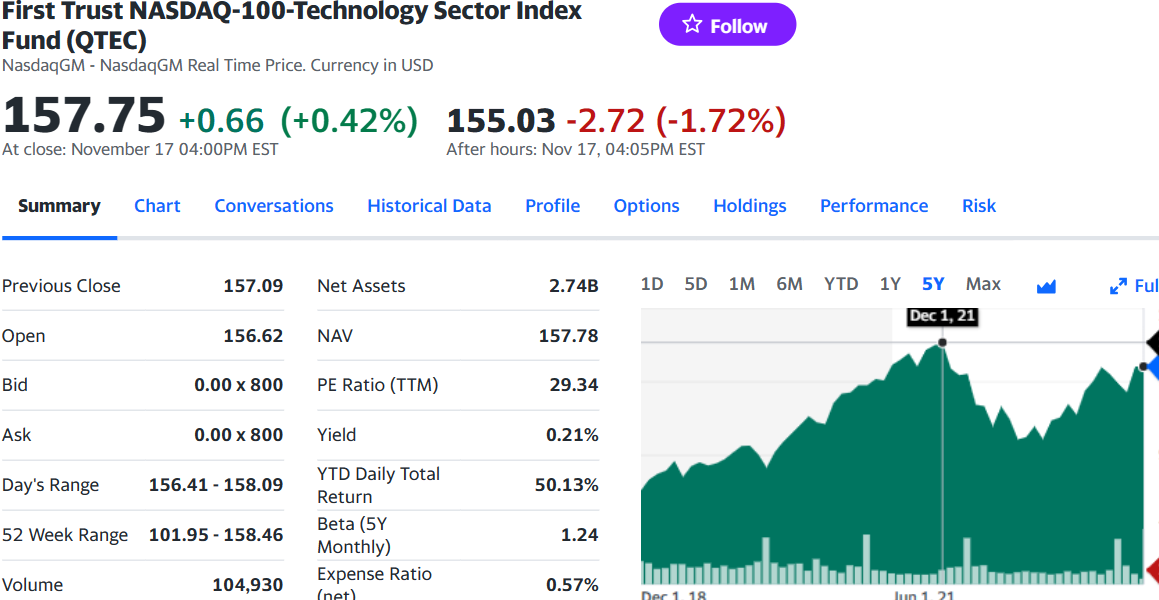

In [294]:
datos_company

,Open,High,Low,Close,Volume,Dividends,Stock Splits,log_returns
Date,,,,,,,,
2004-08-20 00:00:00-04:00,2.515820,2.716817,2.503118,2.697639,458857488,0.0,0.0,0.076433
2004-08-23 00:00:00-04:00,2.758411,2.826406,2.716070,2.724787,366857939,0.0,0.0,0.010013
2004-08-24 00:00:00-04:00,2.770615,2.779581,2.579581,2.611960,306396159,0.0,0.0,-0.042289
2004-08-25 00:00:00-04:00,2.614201,2.689918,2.587302,2.640104,184645512,0.0,0.0,0.010717
2004-08-26 00:00:00-04:00,2.613952,2.688672,2.606729,2.687676,142572401,0.0,0.0,0.017859
...,...,...,...,...,...,...,...,...
2014-12-24 00:00:00-05:00,26.452873,26.515154,26.278851,26.366112,14118657,0.0,0.0,-0.003436
2014-12-26 00:00:00-05:00,26.366112,26.639362,26.293312,26.628391,20810980,0.0,0.0,0.009898
2014-12-29 00:00:00-05:00,26.536644,26.700693,26.427992,26.443897,45570772,0.0,0.0,-0.006953


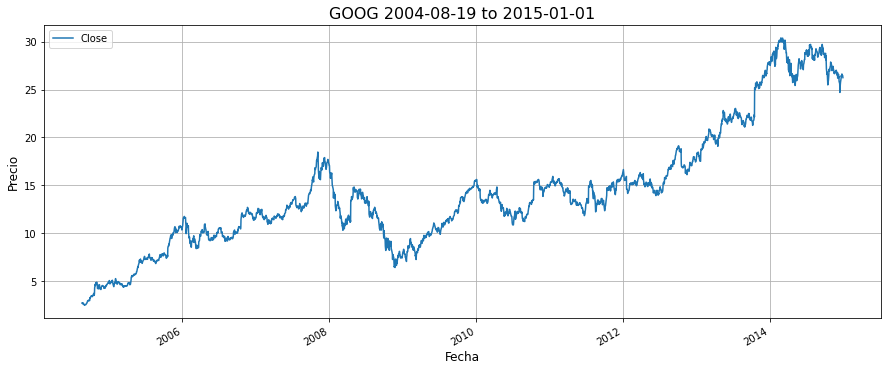

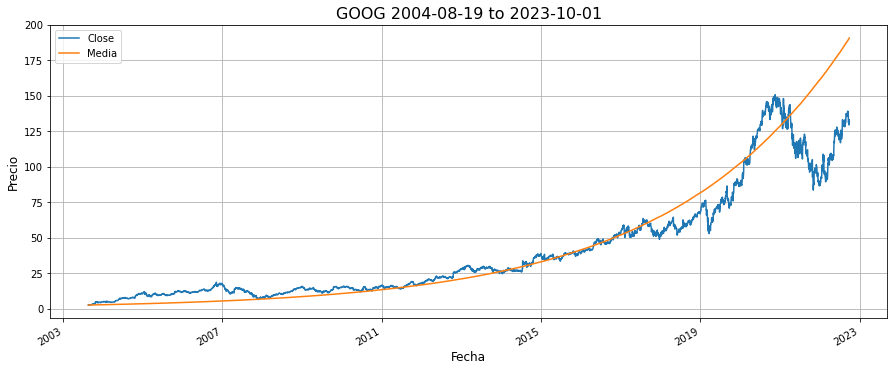

In [420]:
start = "2000-01-01"
end = "2015-01-01"
ticker = 'GOOG'

company = yfinance.Ticker(ticker)
datos_company = company.history(start=start, end=end)
datos_company['log_returns'] = np.log(datos_company['Close'] / datos_company['Close'].shift(1))
inicio_ = datos_company.index[0].strftime('%Y-%m-%d')
datos_company = datos_company.drop(datos_company.index[0])
n_retornos = len(datos_company.index)
mu_est = np.mean(datos_company['log_returns'])
sigma_est = ((n_retornos - 1) * np.std(datos_company['log_returns'])) / n_retornos

datos = pd.DataFrame(datos_company['Close'], datos_company.index)
precios = datos_company['Close'].values
fechas = datos_company.index
dias = len(fechas)
s0 = precios[0]

ax1 = datos.plot(figsize=(15, 6))
ax1.set_title(ticker + ' ' + inicio_ + ' to ' + end, fontsize=16)
ax1.set_xlabel('Fecha', fontsize=12)
ax1.set_ylabel('Precio', fontsize=12)
ax1.grid(True)
ax1.legend()
mu_est, sigma_est

# start = "2010-01-01"
end = "2023-10-01"
company = yfinance.Ticker(ticker)
datos_company = company.history(start=start, end=end)

datos = pd.DataFrame(datos_company['Close'], datos_company.index)
precios = datos_company['Close'].values
fechas = datos_company.index
dias = len(fechas)
s0 = precios[0]

def media(s0, a, t):
    return s0*np.exp((a)*t)

ggg = media(s0, mu_est, range(dias))
dff = pd.DataFrame(index=fechas)
dff['Media'] = ggg

ax1 = datos.plot()
dff.plot(ax=ax1, figsize=(15, 6))
ax1.set_title(ticker + ' ' + inicio_ + ' to ' + end, fontsize=16)
ax1.set_xlabel('Fecha', fontsize=12)
ax1.set_ylabel('Precio', fontsize=12)
ax1.grid(True)
ax1.legend()

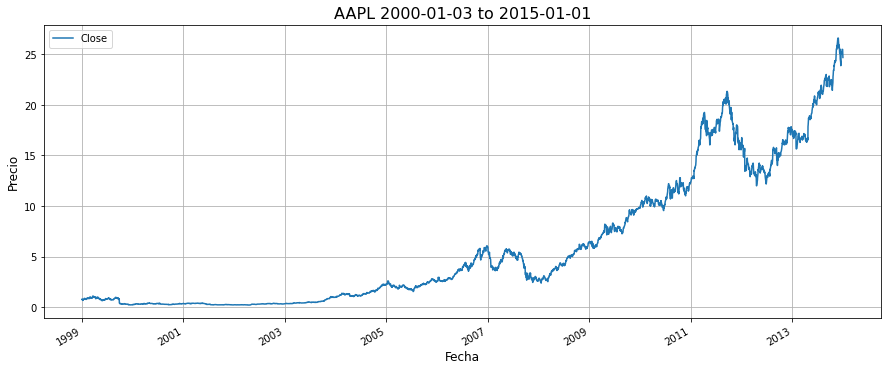

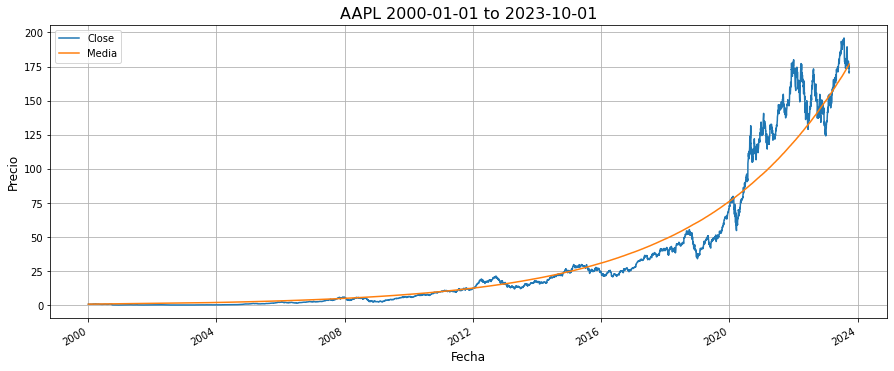

In [423]:
start = "2000-01-01"
end = "2015-01-01"
ticker = 'AAPL'

company = yfinance.Ticker(ticker)
datos_company = company.history(start=start, end=end)
datos_company['log_returns'] = np.log(datos_company['Close'] / datos_company['Close'].shift(1))
inicio_ = datos_company.index[0].strftime('%Y-%m-%d')
datos_company = datos_company.drop(datos_company.index[0])
n_retornos = len(datos_company.index)
mu_est = np.mean(datos_company['log_returns'])
sigma_est = ((n_retornos - 1) * np.std(datos_company['log_returns'])) / n_retornos

datos = pd.DataFrame(datos_company['Close'], datos_company.index)
precios = datos_company['Close'].values
fechas = datos_company.index
dias = len(fechas)
s0 = precios[0]

ax1 = datos.plot(figsize=(15, 6))
ax1.set_title(ticker + ' ' + inicio_ + ' to ' + end, fontsize=16)
ax1.set_xlabel('Fecha', fontsize=12)
ax1.set_ylabel('Precio', fontsize=12)
ax1.grid(True)
ax1.legend()
mu_est, sigma_est

start = "2000-01-01"
end = "2023-10-01"
company = yfinance.Ticker(ticker)
datos_company = company.history(start=start, end=end)

datos = pd.DataFrame(datos_company['Close'], datos_company.index)
precios = datos_company['Close'].values
fechas = datos_company.index
dias = len(fechas)
s0 = precios[0]

def media(s0, a, t):
    return s0*np.exp((a)*t)

ggg = media(s0, mu_est, range(dias))
dff = pd.DataFrame(index=fechas)
dff['Media'] = ggg

ax1 = datos.plot()
dff.plot(ax=ax1, figsize=(15, 6))
ax1.set_title(ticker + ' ' + start + ' to ' + end, fontsize=16)
ax1.set_xlabel('Fecha', fontsize=12)
ax1.set_ylabel('Precio', fontsize=12)
ax1.grid(True)
ax1.legend()

Para Costco:

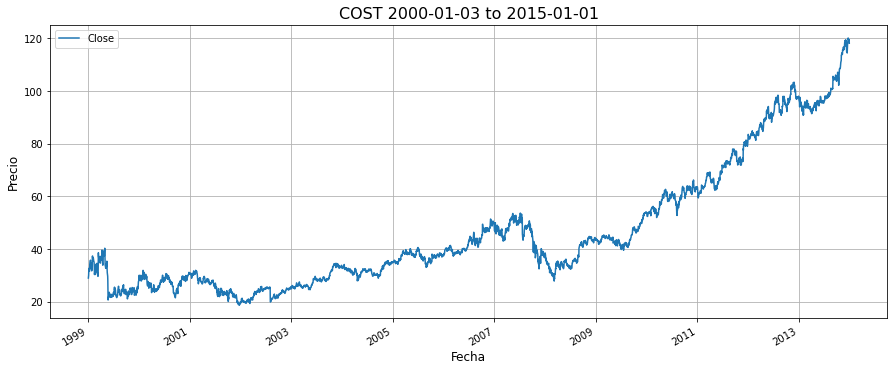

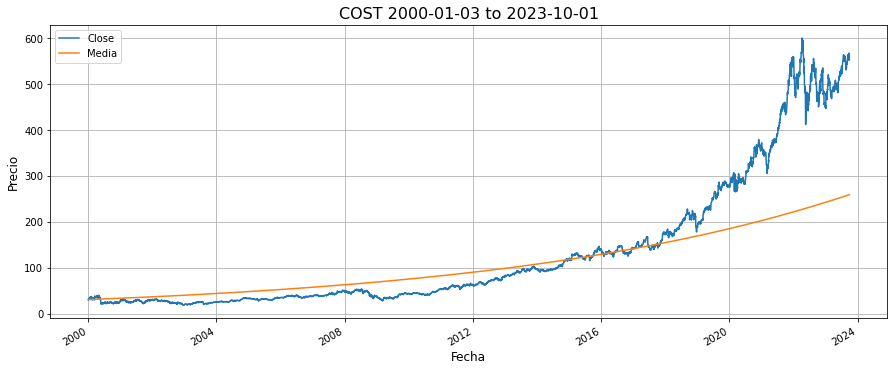

In [442]:
start = "2000-01-01"
end = "2015-01-01"
ticker = 'COST'

company = yfinance.Ticker(ticker)
datos_company = company.history(start=start, end=end)
datos_company['log_returns'] = np.log(datos_company['Close'] / datos_company['Close'].shift(1))
inicio_ = datos_company.index[0].strftime('%Y-%m-%d')
datos_company = datos_company.drop(datos_company.index[0])
n_retornos = len(datos_company.index)
mu_est = np.mean(datos_company['log_returns'])
sigma_est = ((n_retornos - 1) * np.std(datos_company['log_returns'])) / n_retornos

datos = pd.DataFrame(datos_company['Close'], datos_company.index)
precios = datos_company['Close'].values
fechas = datos_company.index
dias = len(fechas)
s0 = precios[0]

ax1 = datos.plot(figsize=(15, 6))
ax1.set_title(ticker + ' ' + inicio_ + ' to ' + end, fontsize=16)
ax1.set_xlabel('Fecha', fontsize=12)
ax1.set_ylabel('Precio', fontsize=12)
ax1.grid(True)
ax1.legend()
mu_est, sigma_est

end = "2023-10-01"
company = yfinance.Ticker(ticker)
datos_company = company.history(start=start, end=end)

datos = pd.DataFrame(datos_company['Close'], datos_company.index)
precios = datos_company['Close'].values
fechas = datos_company.index
dias = len(fechas)
s0 = precios[0]

def media(s0, a, t):
    return s0*np.exp((a)*t)

ggg = media(s0, mu_est, range(dias))
dff = pd.DataFrame(index=fechas)
dff['Media'] = ggg

ax1 = datos.plot()
dff.plot(ax=ax1, figsize=(15, 6))
ax1.set_title(ticker + ' ' + inicio_ + ' to ' + end, fontsize=16)
ax1.set_xlabel('Fecha', fontsize=12)
ax1.set_ylabel('Precio', fontsize=12)
ax1.grid(True)
ax1.legend()

y ahora desde 2010

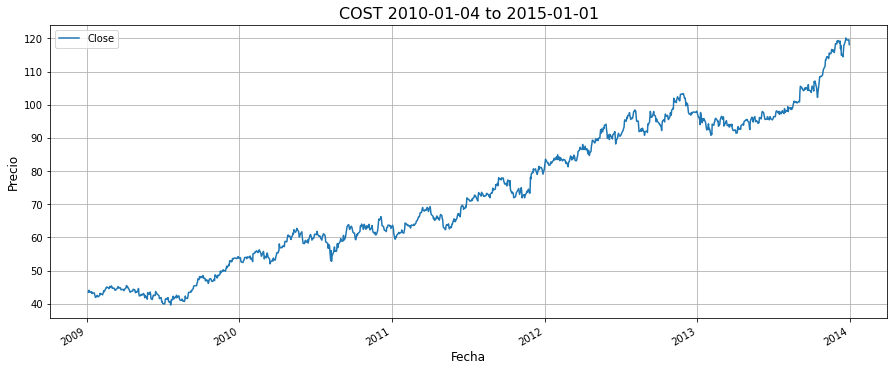

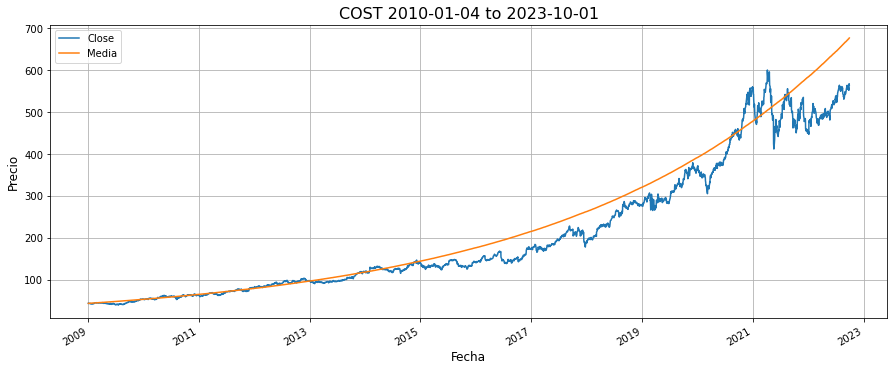

In [443]:
start = "2010-01-01"
end = "2015-01-01"
ticker = 'COST'

company = yfinance.Ticker(ticker)
datos_company = company.history(start=start, end=end)
datos_company['log_returns'] = np.log(datos_company['Close'] / datos_company['Close'].shift(1))
inicio_ = datos_company.index[0].strftime('%Y-%m-%d')
datos_company = datos_company.drop(datos_company.index[0])
n_retornos = len(datos_company.index)
mu_est = np.mean(datos_company['log_returns'])
sigma_est = ((n_retornos - 1) * np.std(datos_company['log_returns'])) / n_retornos

datos = pd.DataFrame(datos_company['Close'], datos_company.index)
precios = datos_company['Close'].values
fechas = datos_company.index
dias = len(fechas)
s0 = precios[0]

ax1 = datos.plot(figsize=(15, 6))
ax1.set_title(ticker + ' ' + inicio_ + ' to ' + end, fontsize=16)
ax1.set_xlabel('Fecha', fontsize=12)
ax1.set_ylabel('Precio', fontsize=12)
ax1.grid(True)
ax1.legend()
mu_est, sigma_est

end = "2023-10-01"
company = yfinance.Ticker(ticker)
datos_company = company.history(start=start, end=end)

datos = pd.DataFrame(datos_company['Close'], datos_company.index)
precios = datos_company['Close'].values
fechas = datos_company.index
dias = len(fechas)
s0 = precios[0]

def media(s0, a, t):
    return s0*np.exp((a)*t)

ggg = media(s0, mu_est, range(dias))
dff = pd.DataFrame(index=fechas)
dff['Media'] = ggg

ax1 = datos.plot()
dff.plot(ax=ax1, figsize=(15, 6))
ax1.set_title(ticker + ' ' + inicio_ + ' to ' + end, fontsize=16)
ax1.set_xlabel('Fecha', fontsize=12)
ax1.set_ylabel('Precio', fontsize=12)
ax1.grid(True)
ax1.legend()

Vemos que es crucial los años que escogemos para estimar los parámetros, ya que en este ejemplo, pudimos observar que un buen ajuste depende de una buena estimación de la media y varianza. Y más específicamente de la media, ya que la media es la única presente en el valor esperado del modelo, el cual nos es útil para comparar con los precios reales.

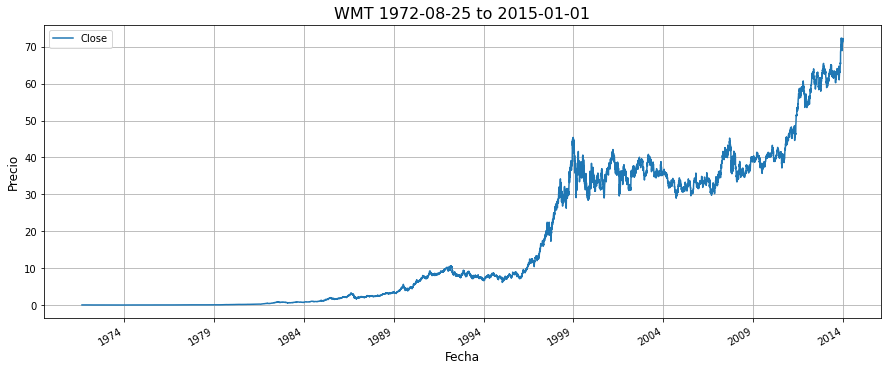

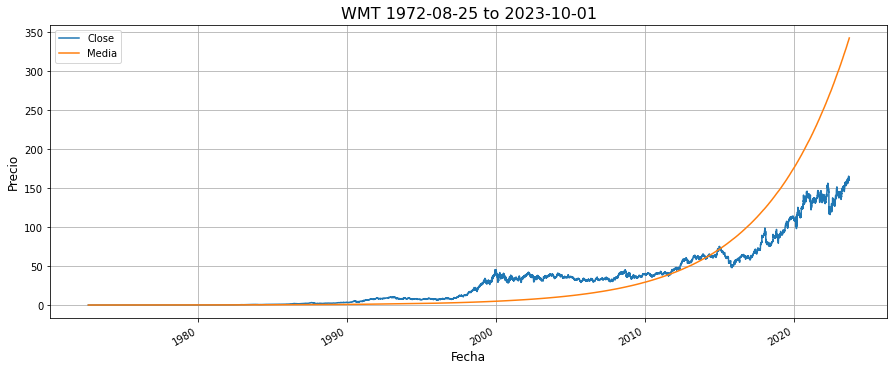

In [437]:
start = "1950-01-01"
end = "2015-01-01"
ticker = 'WMT'

company = yfinance.Ticker(ticker)
datos_company = company.history(start=start, end=end)
datos_company['log_returns'] = np.log(datos_company['Close'] / datos_company['Close'].shift(1))
inicio_ = datos_company.index[0].strftime('%Y-%m-%d')
datos_company = datos_company.drop(datos_company.index[0])
n_retornos = len(datos_company.index)
mu_est = np.mean(datos_company['log_returns'])
sigma_est = ((n_retornos - 1) * np.std(datos_company['log_returns'])) / n_retornos

datos = pd.DataFrame(datos_company['Close'], datos_company.index)
precios = datos_company['Close'].values
fechas = datos_company.index
dias = len(fechas)
s0 = precios[0]

ax1 = datos.plot(figsize=(15, 6))
ax1.set_title(ticker + ' ' + inicio_ + ' to ' + end, fontsize=16)
ax1.set_xlabel('Fecha', fontsize=12)
ax1.set_ylabel('Precio', fontsize=12)
ax1.grid(True)
ax1.legend()
mu_est, sigma_est

end = "2023-10-01"
company = yfinance.Ticker(ticker)
datos_company = company.history(start=start, end=end)

datos = pd.DataFrame(datos_company['Close'], datos_company.index)
precios = datos_company['Close'].values
fechas = datos_company.index
dias = len(fechas)
s0 = precios[0]

def media(s0, a, t):
    return s0*np.exp((a)*t)

ggg = media(s0, mu_est, range(dias))
dff = pd.DataFrame(index=fechas)
dff['Media'] = ggg

ax1 = datos.plot()
dff.plot(ax=ax1, figsize=(15, 6))
ax1.set_title(ticker + ' ' + inicio_ + ' to ' + end, fontsize=16)
ax1.set_xlabel('Fecha', fontsize=12)
ax1.set_ylabel('Precio', fontsize=12)
ax1.grid(True)
ax1.legend()

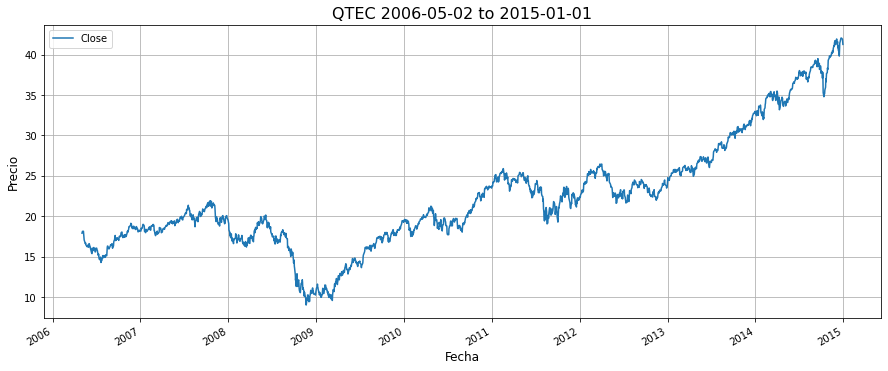

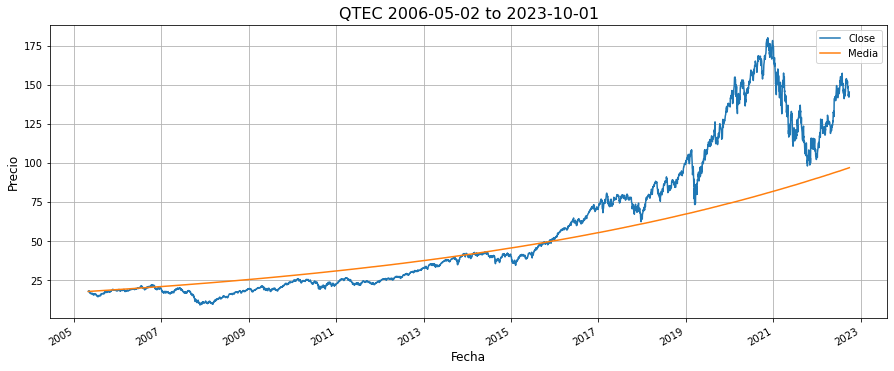

In [431]:
start = "2000-01-01"
end = "2015-01-01"
ticker = 'QTEC'

company = yfinance.Ticker(ticker)
datos_company = company.history(start=start, end=end)
datos_company['log_returns'] = np.log(datos_company['Close'] / datos_company['Close'].shift(1))
inicio_ = datos_company.index[0].strftime('%Y-%m-%d')
datos_company = datos_company.drop(datos_company.index[0])
n_retornos = len(datos_company.index)
mu_est = np.mean(datos_company['log_returns'])
sigma_est = ((n_retornos - 1) * np.std(datos_company['log_returns'])) / n_retornos

datos = pd.DataFrame(datos_company['Close'], datos_company.index)
precios = datos_company['Close'].values
fechas = datos_company.index
dias = len(fechas)
s0 = precios[0]

ax1 = datos.plot(figsize=(15, 6))
ax1.set_title(ticker + ' ' + inicio_ + ' to ' + end, fontsize=16)
ax1.set_xlabel('Fecha', fontsize=12)
ax1.set_ylabel('Precio', fontsize=12)
ax1.grid(True)
ax1.legend()
mu_est, sigma_est

end = "2023-10-01"
company = yfinance.Ticker(ticker)
datos_company = company.history(start=start, end=end)

datos = pd.DataFrame(datos_company['Close'], datos_company.index)
precios = datos_company['Close'].values
fechas = datos_company.index
dias = len(fechas)
s0 = precios[0]

def media(s0, a, t):
    return s0*np.exp((a)*t)

ggg = media(s0, mu_est, range(dias))
dff = pd.DataFrame(index=fechas)
dff['Media'] = ggg

ax1 = datos.plot()
dff.plot(ax=ax1, figsize=(15, 6))
ax1.set_title(ticker + ' ' + inicio_ + ' to ' + end, fontsize=16)
ax1.set_xlabel('Fecha', fontsize=12)
ax1.set_ylabel('Precio', fontsize=12)
ax1.grid(True)
ax1.legend()

Podemos observar que principalmente, el modelo se ajusta al sector tecnológico, y a algunas empresas de distintos sectores, pero recordemos que es de suma importancia la estimación de nuestros parámetros.